In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## GOAL:

1. Choose Dataset
2. Perform KNN _and_ OLS Regression Models
3. In a markdown cell, explain (a) the similarities and differences; (b) which one you prefer, and what circumstances would change your preference; and (c) identify what it is about the dataset that leads you to choose one model over the other.

In [2]:
# For the dataset, I'm going to choose the one that we have been doing - the jazz vs. rock set

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [ ]:
# gotta split the data
xtrain, ytrain, yadda yadda yadda Work with that

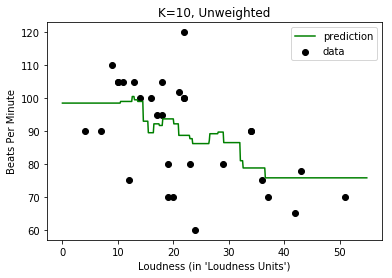

In [58]:
from sklearn import neighbors

# Build our model - focusing on loudness only here!!!!!

# only use xtrain y train here

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 55, 0.1)[:, np.newaxis] # really just arbitrary substitute for 

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.xlabel("Loudness (in 'Loudness Units')")
plt.ylabel('Beats Per Minute')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
neighbors.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [76]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, random_state=20)

In [77]:
neighbors.fit(X_train, y_train)
Ypred = neighbors.predict(X_test)

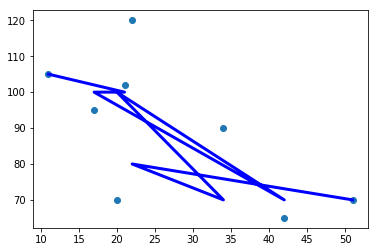

In [79]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Ypred, color='blue', linewidth=3)
plt.show()

In [83]:
# obtaining score

neighbors.score(X_test, y_test)
# ummmmmm not the best

0.25

In [92]:
# cross validate with 20 folds

from sklearn.model_selection import cross_val_score
score = cross_val_score(neighbors, X_test, y_test, cv=8) 
print(score)
print('\n')
# Number of samples in testing set = 8 (so doing "Leave One Out" method)

print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

ValueError: n_splits=8 cannot be greater than the number of members in each class.

In [90]:
#Don't understand the above - need to ask the mentor

array([[51],
       [22],
       [34],
       [20],
       [42],
       [17],
       [21],
       [11]], dtype=int64)

In [75]:
# Gonna try my wits on a mesh

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 0].min() - .5
y_max = X[:, 0].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

ValueError: query data dimension must match training data dimension

In [8]:
# cross validate with 20 folds

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=20)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -17.49 (+/- 91.21)


In [21]:
# Now for OLS Regression
# ...impossible to transform because data is both above and below line.
# ASK MENTOR HOW TO APPROACH?

# The following is what I intend to do to fix to see if it makes a difference.
from sklearn.preprocessing import RobustScaler
Xnew = RobustScaler().fit(X)
Ynew = Y
Ynew = pd.DataFrame(Ynew)
Ynew = RobustScaler().fit(Ynew)


In [31]:
Ytest = Y.values.reshape(-1,1)
Ynew = Ynew.transform(Ytest)
Xtest = X.values.reshape(-1,1)
Xnew = Xnew.transform(Xtest)

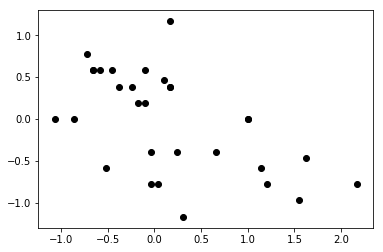

In [32]:
plt.scatter(Xnew, Ynew, c='k', label='data')
plt.show()

In [37]:
# skip that step. It's stupid anyway.

import statsmodels.formula.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bpm   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     64.52
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           7.39e-09
Time:                        18:43:36   Log-Likelihood:                -160.21
No. Observations:                  30   AIC:                             322.4
Df Residuals:                      29   BIC:                             323.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loudness       3.0463      0.379      8.032      0.000       2.271       3.822
==============================================================================
Omnibus:                        2.906   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.598
Skew:                          -0.677   Prob(JB):                        0.273
Kurtosis:                       2.506   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

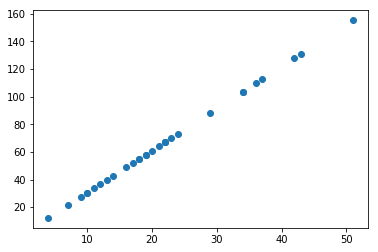

In [38]:
plt.scatter(X, predictions)

In [40]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, random_state=20)

In [43]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [45]:
Ypredict = lm.predict(X_test)

In [46]:
# for the grand finale
lm.score(y_test, Ypredict)

ValueError: Expected 2D array, got 1D array instead:
array=[ 70 120  90  70  65  95 102 105].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
y_test = y_test.values.reshape(-1,1)
# for the grand finale
lm.score(y_test, Ypredict)

-27.59064994298746

In [49]:
from sklearn.metrics import r2_score

print('Variance score: %.2f' %r2_score(y_test, Ypredict))

Variance score: 0.30


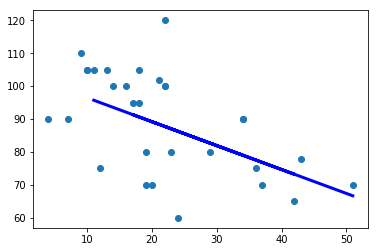

In [56]:
plt.scatter(X, Y)
plt.plot(X_test, Ypredict, color='blue', linewidth=3)
plt.show()

In [84]:
# cross validate with 20 folds

from sklearn.model_selection import cross_val_score
score = cross_val_score(lm, X_test, y_test, cv=7) 
print(score)
print('\n')
# Number of samples in testing set = 8 (so doing "Leave One Out" method)

print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[0.22775542 0.         0.         0.         0.         0.
 0.        ]


Unweighted Accuracy: 0.03 (+/- 0.16)


In [ ]:
# yeap. sounds about right...

# So What did we Learn?

__Similarities:__ OLS and KNN are designed to find nearest neighbors - KNN literally doing that and OLS minimizing error space between the regression line and the actual data.

__Differences:__ The largest difference is that KNN is done in any direction - OLS on the other hand compiles down to a prediction line in a single direction (for _linear_ regressions, anyway).

__What do I prefer?:__ For this dataset, I prefer KNN. The variance is high, meaning it is impossible to transform it to anything that closely resembles linearity. If the points were closer to linear, OLS would provide a stronger prediction model (with the added benefit of being less suscepitble to overfitting).

__What would change my preferences?:__ Like I said, linearity is important. OLS here gave me a negative R^2 value, which is no bueno. If the data points were clustered more closely, I would've gone the OLS regression route.